# Prediction using Unsupervised ML

## Optimal Number of Clusters for Iris Dataset Analysis using K-means Clustering
In this analysis, I explored the Iris dataset to determine the optimal number of clusters using the K-means clustering algorithm. To find the optimal number of clusters, I utilized Elbow method. The Elbow method helps identify the point at which the rate of decrease of within-cluster sum of squares (WCSS) slows down, indicating the optimal number of clusters. 

In [3]:
# import required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

## Data Loading And Preprocessing

In [4]:
# Loading the dataset to understand the data structure
data = pd.read_csv(r"C:\Users\PHOENIX\OneDrive\Desktop\CSV Files\Iris.csv") 
data.drop(columns=["Id","Species"],inplace=True)
# Displaying the first few rows of the 'data'
data.head()

,Sepal Length (Cm),Sepal Width (Cm),Petal Length (Cm),Petal Width (Cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# shape of a dataset
data.shape

(150, 4)

In [6]:
# missing values in each column of the 'data'
data.isnull().sum()

Sepal Length (Cm)    0
Sepal Width (Cm)     0
Petal Length (Cm)    0
Petal Width (Cm)     0
dtype: int64

### Determining the Optimal Number of Clusters for K-Means Clustering: Methods for Finding the Best Value of K 

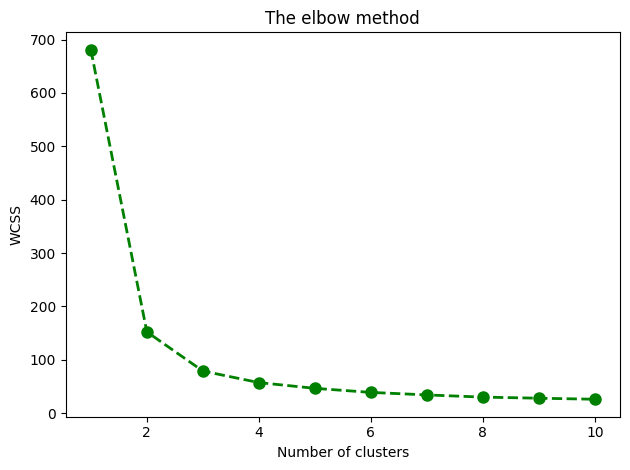

In [7]:
# finding the optimum number of clusters for K-means classification
x = data.iloc[:,[0,1,2,3]].values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Visualizing the Elbow Method: Determining the Optimal Number of Clusters
plt.plot(range(1,11),wcss,color='green', marker='o', linestyle='--', linewidth=2, markersize=8) 
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.tight_layout()

The plot above illustrates the 'Elbow Method' for determining the optimal number of clusters in K-means clustering. The elbow point, where the within-cluster sum of squares (WCSS) no longer decreases significantly with the addition of more clusters, indicates the ideal number of clusters. In this case, the elbow point is observed at '3' clusters. Therefore, we select '3' as the optimal number of clusters for our analysis.r

In [8]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(x)

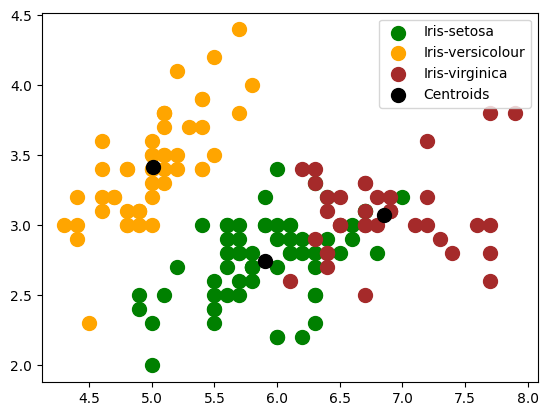

In [9]:
#Visualizing Clusters and Centroids on the First Two Columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()


After determining the optimal number of clusters, I visualized the clusters using a scatter plot. Each data point represents an iris flower, colored according to its assigned cluster, with centroids indicating the cluster centers.